# Titanic dataset K-NN model and SVM Model

In [1]:
# import header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Read data set to python environment
data=pd.read_csv('C:/Users/deepesh/Downloads/titanicDataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 4. Fill in all the missing values present in the age & Embarked column in the dataset

In [5]:
# Checking for NULL values in Age column
data['Age'].isna().sum()

177

In [6]:
#Filling Missing Age values with Mean value
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
data['Age'].isna().sum()

0

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#Filling missing value in Embarked column with mode,ie 'S'
data['Embarked']=data['Embarked'].fillna('S')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# label encode embark column data

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


# Label encode sex column data

In [12]:
data['Sex']=label_encoder.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [13]:
data['Ticket'].nunique()

681

In [14]:
# Drop name,ticket,fare and Cabin column
data1=data.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

## combining SiblingSpouse(SibSp) and ParentChild(Parch) columns into a single Family column

In [15]:
data1['Family']=data1['SibSp']+data1['Parch']+1

In [16]:
data1=data1.drop(['SibSp','Parch'],axis=1)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Embarked    891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(2), int64(3)
memory usage: 34.9 KB


### Seperating features and target fields

In [18]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

### Seperating train set and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## K-NN Model Creation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
metric_k=[]    #empty list
neighbors=range(3,15)
for k in neighbors:
    classifr=KNeighborsClassifier(n_neighbors=k)
    classifr=classifr.fit(x_train,y_train)
    y_pred_KNN=classifr.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

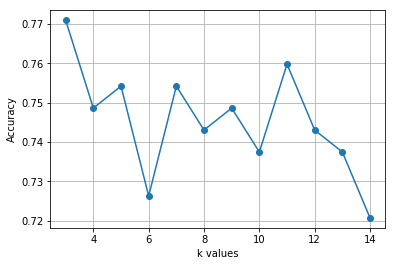

In [23]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()

In [24]:
classifr=KNeighborsClassifier(n_neighbors=7)
classifr=classifr.fit(x_train,y_train)
y_pred_KNN=classifr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,y_pred_KNN)

array([[91, 14],
       [30, 44]], dtype=int64)

In [27]:
print('Accuracy:',accuracy_score(y_test,y_pred_KNN))

Accuracy: 0.7541899441340782


## SVM model creation

In [28]:
from sklearn.svm import SVC

In [29]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

## K-FOLD Cross Validation for K_NN model

In [32]:
from sklearn.model_selection import KFold

In [33]:
kfold_validator=KFold(10)

In [34]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Test index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cv_result=cross_val_score(classifr,x,y,cv=kfold_validator)

In [37]:
cv_result

array([0.66666667, 0.7752809 , 0.78651685, 0.76404494, 0.76404494,
       0.76404494, 0.75280899, 0.74157303, 0.74157303, 0.7752809 ])

In [38]:
np.mean(cv_result)

0.753183520599251

## K-fold cross Validation for SVM model

In [39]:
cv_result_svm=cross_val_score(svm_clf,x,y,cv=kfold_validator)
cv_result_svm

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [40]:
np.mean(cv_result_svm)

0.786729088639201

## Stratified K-Fold Cross Validation for K-NN model

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
skfold_validator=StratifiedKFold(n_splits=10)

In [43]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Test index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [44]:
skcv_result=cross_val_score(classifr,x,y,cv=skfold_validator)

In [45]:
skcv_result

array([0.68888889, 0.71111111, 0.75280899, 0.79775281, 0.78651685,
       0.76404494, 0.7752809 , 0.73033708, 0.80898876, 0.77272727])

In [46]:
np.mean(skcv_result)

0.7588457609805924

## Stratified K-fold Cross validation for SVM model

In [47]:
skcv_result_svm=cross_val_score(svm_clf,x,y,cv=skfold_validator)
skcv_result_svm

array([0.81111111, 0.78888889, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

In [48]:
np.mean(skcv_result_svm)

0.7866981613891727